<a href="https://colab.research.google.com/github/douglasmmachado/MedicineConsumption/blob/main/notebooks/division_approach/3_Feature_Manipulation_and_Comprehension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 - Understanding feautures and selecting the most important ones regarding the consumption



---



---



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math as m

df_h1_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/main/datasets/division_approach/df_h1_resampled.csv"
df_h2_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/main/datasets/division_approach/df_h2_resampled.csv"
df_h3_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/main/datasets/division_approach/df_h3_resampled.csv"
df_h4_url ="https://raw.githubusercontent.com/douglasmmachado/ExploratoryDataAnalysis/main/datasets/division_approach/df_h4_resampled.csv"



df_h1 = pd.read_csv(df_h1_url)
df_h2 = pd.read_csv(df_h2_url)
df_h3 = pd.read_csv(df_h3_url)
df_h4 = pd.read_csv(df_h4_url)

In [ ]:
df_h1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1208 entries, 0 to 1207
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HOSPI_CODE_UCD  1208 non-null   int64  
 1   YEAR            1208 non-null   float64
 2   MONTH           1208 non-null   float64
 3   QUANTITY        1208 non-null   float64
 4   N_UFS           1208 non-null   float64
 5   N_ETB           1208 non-null   float64
 6   POPULATION      1208 non-null   float64
 7   P_MEDICAL       1208 non-null   float64
 8   PN_MEDICAL      1208 non-null   float64
 9   LIT_HC          1208 non-null   float64
 10  LIT_HP          1208 non-null   float64
 11  SEJ_MCO         1208 non-null   float64
 12  SEJ_HAD         1208 non-null   float64
 13  SEJ_PSY         1208 non-null   float64
 14  SEJ_SSR         1208 non-null   float64
 15  SEJ_SLD         1208 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 151.1 KB


In [ ]:
df_h2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HOSPI_CODE_UCD  697 non-null    int64  
 1   YEAR            697 non-null    float64
 2   MONTH           697 non-null    float64
 3   QUANTITY        697 non-null    float64
 4   N_UFS           697 non-null    float64
 5   N_ETB           697 non-null    float64
 6   POPULATION      697 non-null    float64
 7   P_MEDICAL       697 non-null    float64
 8   PN_MEDICAL      697 non-null    float64
 9   LIT_HC          697 non-null    float64
 10  LIT_HP          697 non-null    float64
 11  SEJ_MCO         697 non-null    float64
 12  SEJ_HAD         697 non-null    float64
 13  SEJ_PSY         697 non-null    float64
 14  SEJ_SSR         697 non-null    float64
 15  SEJ_SLD         697 non-null    float64
dtypes: float64(15), int64(1)
memory usage: 87.2 KB


In [ ]:
df_h3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1397 entries, 0 to 1396
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HOSPI_CODE_UCD  1397 non-null   int64  
 1   YEAR            1397 non-null   float64
 2   MONTH           1397 non-null   float64
 3   QUANTITY        1397 non-null   float64
 4   N_UFS           1397 non-null   float64
 5   N_ETB           1397 non-null   float64
 6   POPULATION      1397 non-null   float64
 7   P_MEDICAL       1397 non-null   float64
 8   PN_MEDICAL      1397 non-null   float64
 9   LIT_HC          1397 non-null   float64
 10  LIT_HP          1397 non-null   float64
 11  SEJ_MCO         1397 non-null   float64
 12  SEJ_HAD         1397 non-null   float64
 13  SEJ_PSY         1397 non-null   float64
 14  SEJ_SSR         1397 non-null   float64
 15  SEJ_SLD         1397 non-null   float64
dtypes: float64(15), int64(1)
memory usage: 174.8 KB


In [ ]:
df_h4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 770 entries, 0 to 769
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HOSPI_CODE_UCD  770 non-null    int64  
 1   YEAR            770 non-null    float64
 2   MONTH           770 non-null    float64
 3   QUANTITY        770 non-null    float64
 4   N_UFS           770 non-null    float64
 5   N_ETB           770 non-null    float64
 6   POPULATION      770 non-null    float64
 7   P_MEDICAL       770 non-null    float64
 8   PN_MEDICAL      770 non-null    float64
 9   LIT_HC          770 non-null    float64
 10  LIT_HP          770 non-null    float64
 11  SEJ_MCO         770 non-null    float64
 12  SEJ_HAD         770 non-null    float64
 13  SEJ_PSY         770 non-null    float64
 14  SEJ_SSR         770 non-null    float64
 15  SEJ_SLD         770 non-null    float64
dtypes: float64(15), int64(1)
memory usage: 96.4 KB


## 3.1 - Create moving average feature based on medicine

In [ ]:
def calculate_moving_average(df, column, period):
    df_copy = df.copy()  # Create a copy of the DataFrame to avoid modifying the original

    for medicine in df_copy['HOSPI_CODE_UCD'].unique():
        mask = df_copy['HOSPI_CODE_UCD'] == medicine
        ma_column = column + '_MA'

        # Calculate the moving average
        vector = df_copy.loc[mask, column].values
        moving_average = np.zeros_like(vector)

        # Calculate the moving average for each index in the vector
        for i in range(len(vector)):
            start = max(0, i - period + 1)
            end = i + 1
            moving_average[i] = np.nanmean(vector[start:end])

        df_copy.loc[mask, ma_column] = moving_average /  np.linalg.norm(moving_average)

    return df_copy

In [ ]:
def scatterplot_quantity(df, column, period):
    plt.figure(figsize=(15, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(df['HOSPI_CODE_UCD'].unique())))

    for i, code in enumerate(df['HOSPI_CODE_UCD'].unique()):
        subset = df[df['HOSPI_CODE_UCD'] == code]
        plt.plot(subset[column], marker='o', linewidth=0.5, color=colors[i], label=code)

    plt.xlabel('Samples')
    plt.ylabel('Quantity')
    plt.title('Scatter Plot of Quantity moving average for the period of: ' + f'{period} months' )
    plt.xticks(rotation=45)
    plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), title='HOSPI_CODE_UCD')
    plt.grid(True)
    plt.show()


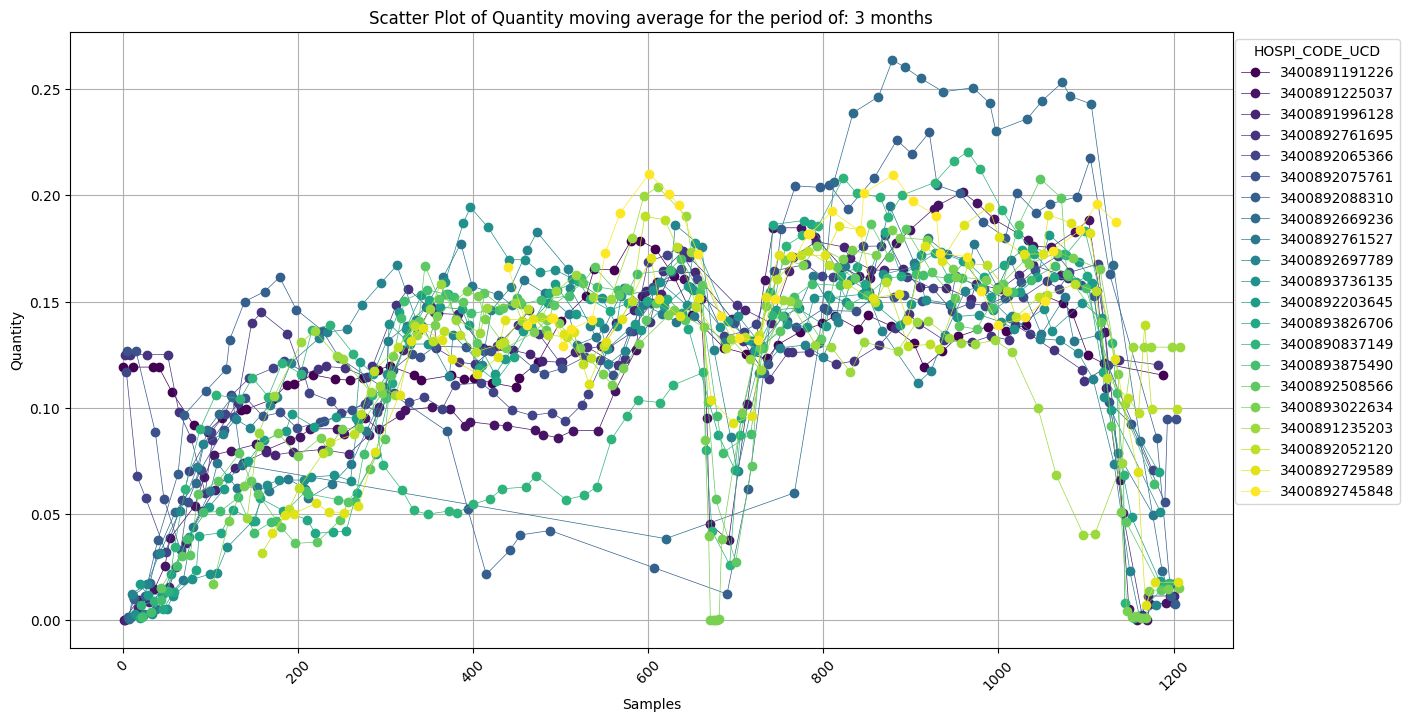

In [ ]:
df_h1_ma_3 = calculate_moving_average(df_h1.copy(), 'QUANTITY', 3)
df_h1_ma_3 = df_h1_ma_3.sort_index(axis=1).reset_index(drop=True)
scatterplot_quantity(df_h1_ma_3, 'QUANTITY_MA', 3)

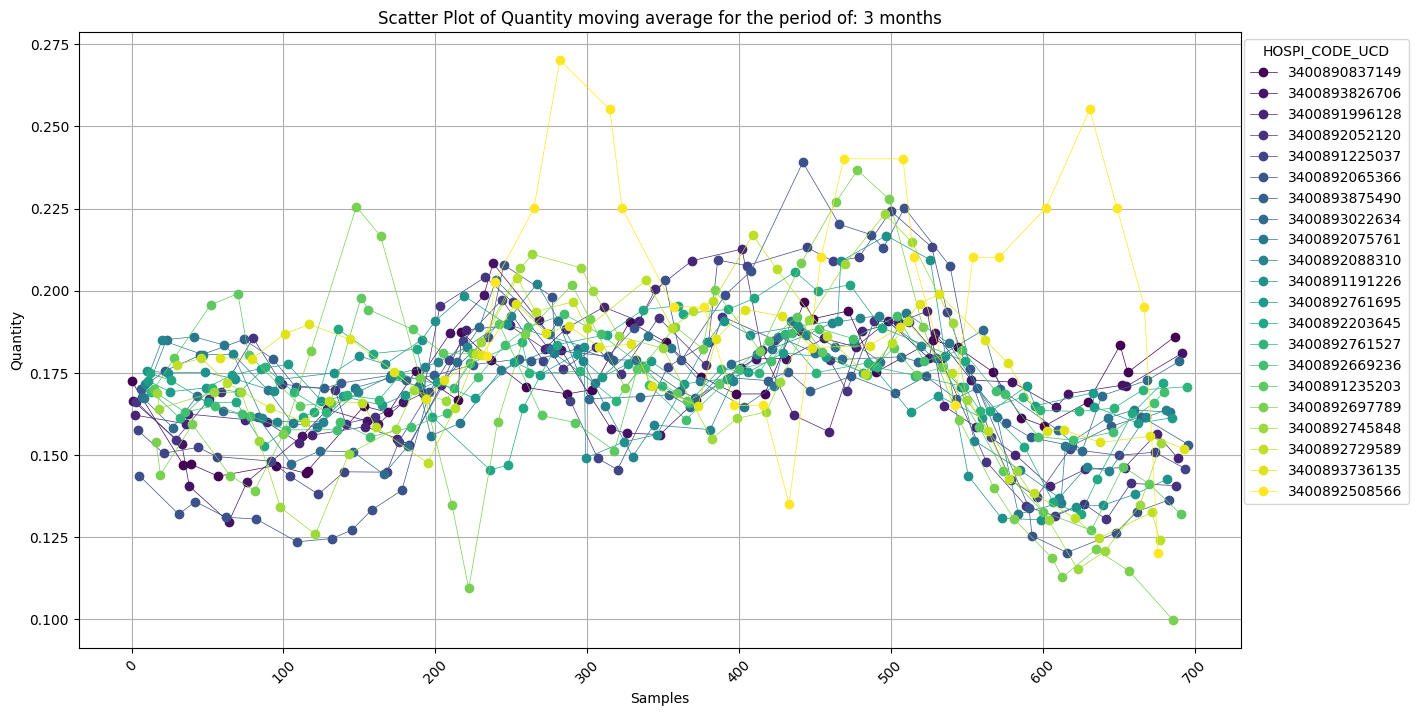

In [ ]:
df_h2_ma_3 = calculate_moving_average(df_h2.copy(), 'QUANTITY', 3)
df_h2_ma_3 = df_h2_ma_3.sort_index(axis=1).reset_index(drop=True)
scatterplot_quantity(df_h2_ma_3, 'QUANTITY_MA', 3)

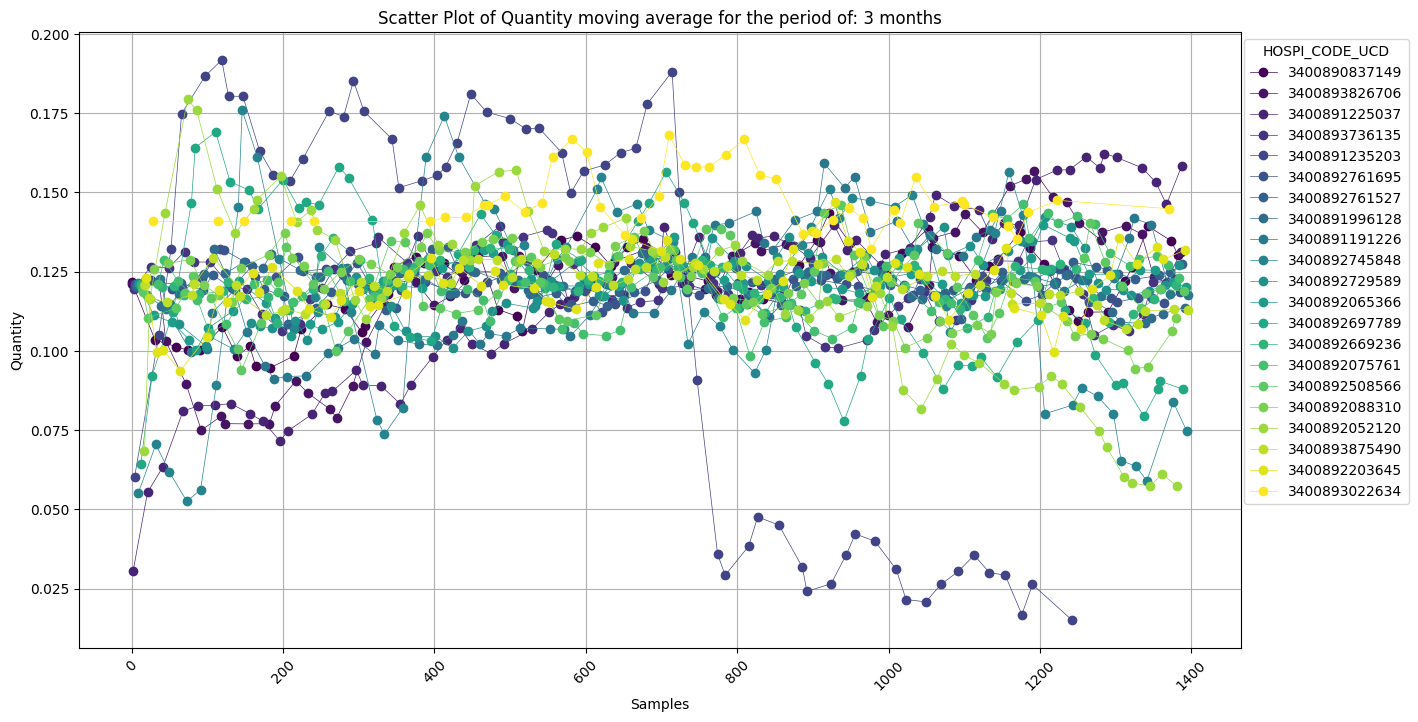

In [ ]:
df_h3_ma_3 = calculate_moving_average(df_h3.copy(), 'QUANTITY', 3)
df_h3_ma_3 = df_h3_ma_3.sort_index(axis=1).reset_index(drop=True)
scatterplot_quantity(df_h3_ma_3, 'QUANTITY_MA', 3)

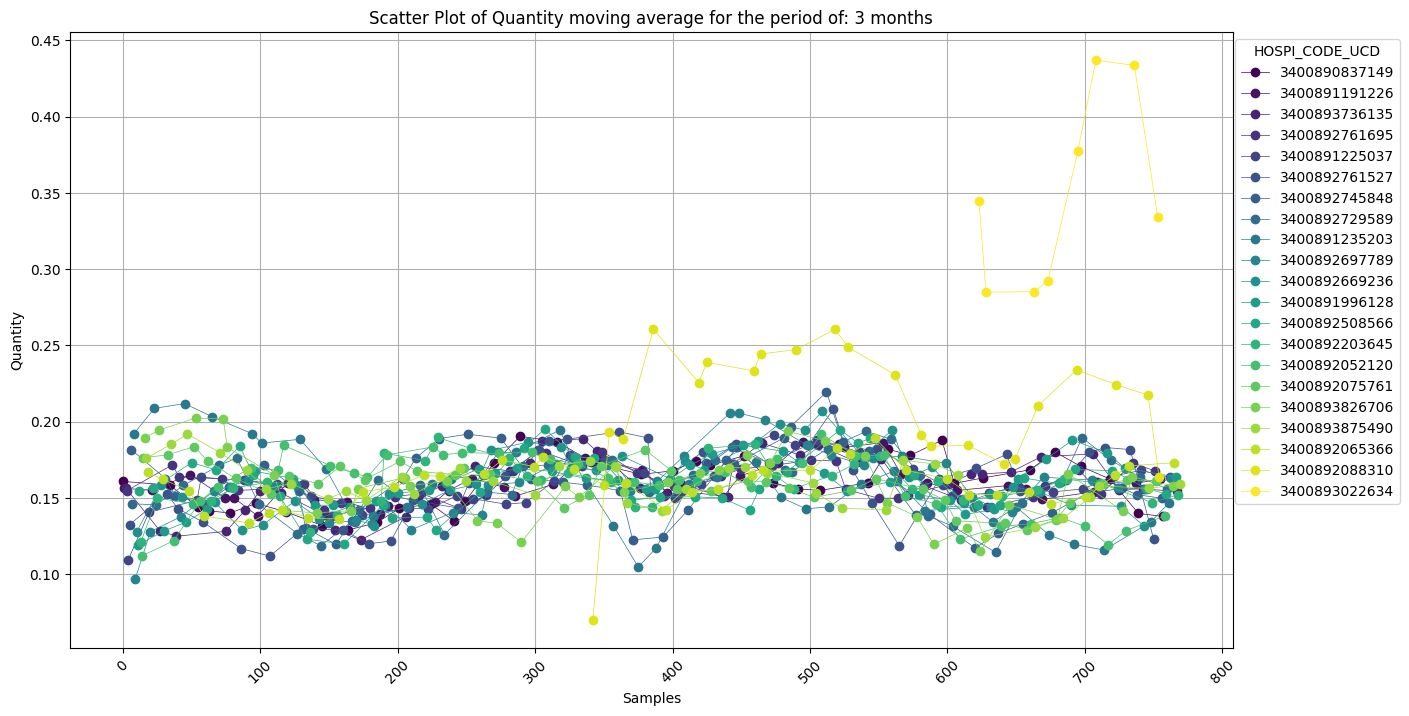

In [ ]:
df_h4_ma_3 = calculate_moving_average(df_h4.copy(), 'QUANTITY', 3)
df_h4_ma_3 = df_h4_ma_3.sort_index(axis=1).reset_index(drop=True)
scatterplot_quantity(df_h4_ma_3, 'QUANTITY_MA', 3)

## 3.2 - Correlation analysis

<Axes: >

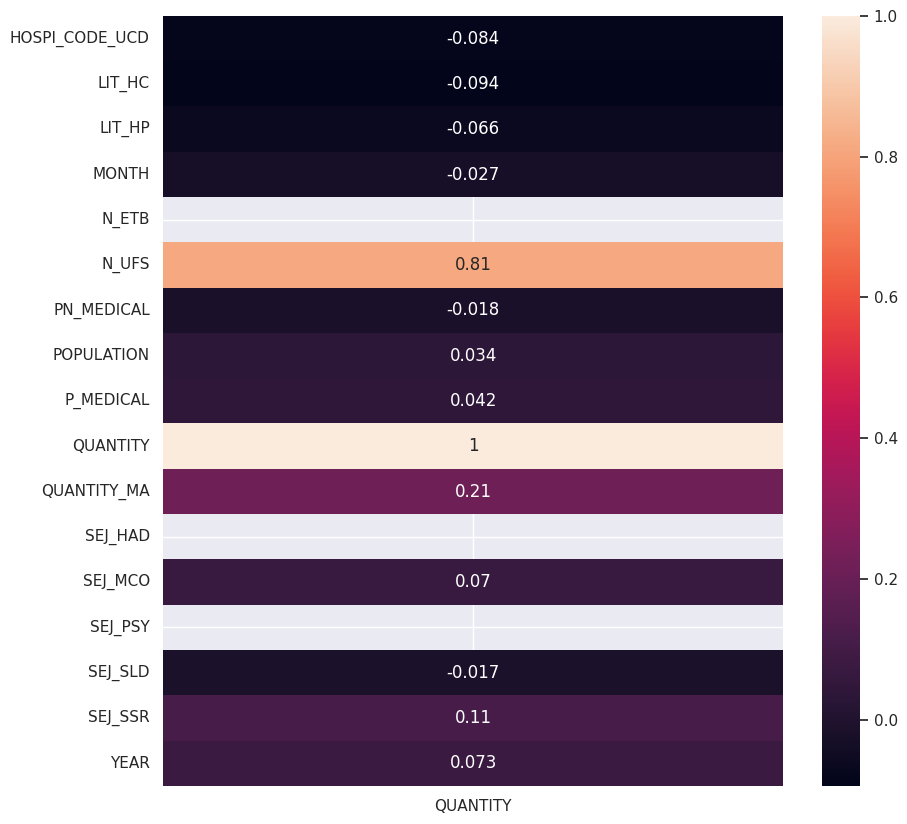

In [ ]:
corr = df_h1_ma_3.corr(numeric_only=True)
x = corr[['QUANTITY']]
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(x,annot=True)

<Axes: >

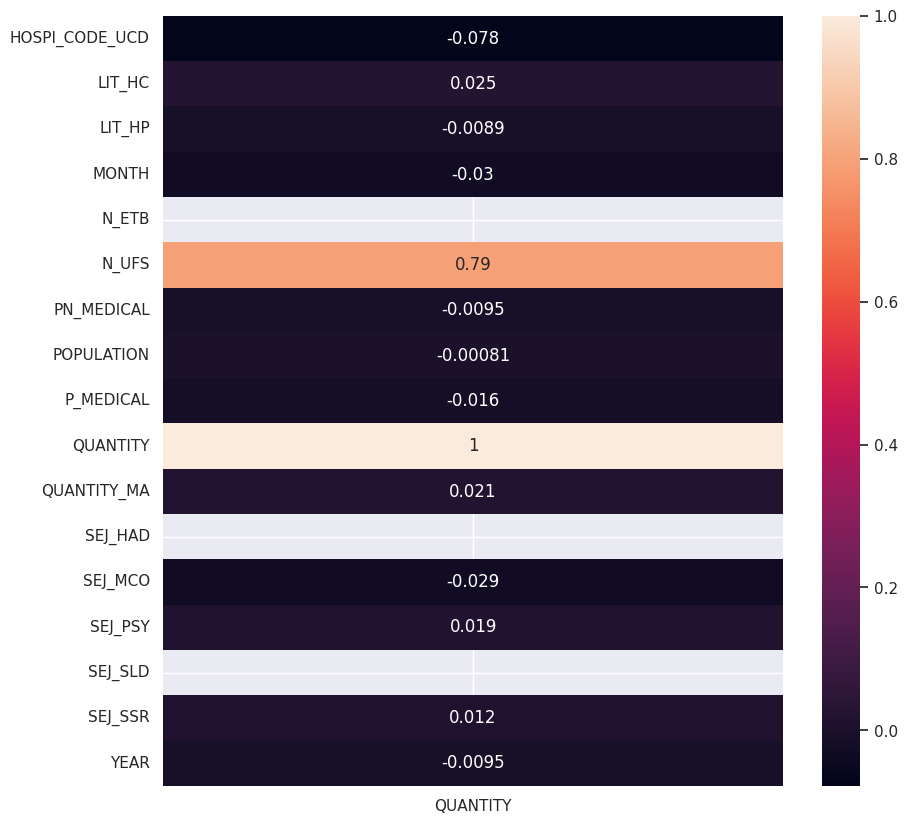

In [ ]:
corr = df_h2_ma_3.corr(numeric_only=True)
x = corr[['QUANTITY']]
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(x,annot=True)

<Axes: >

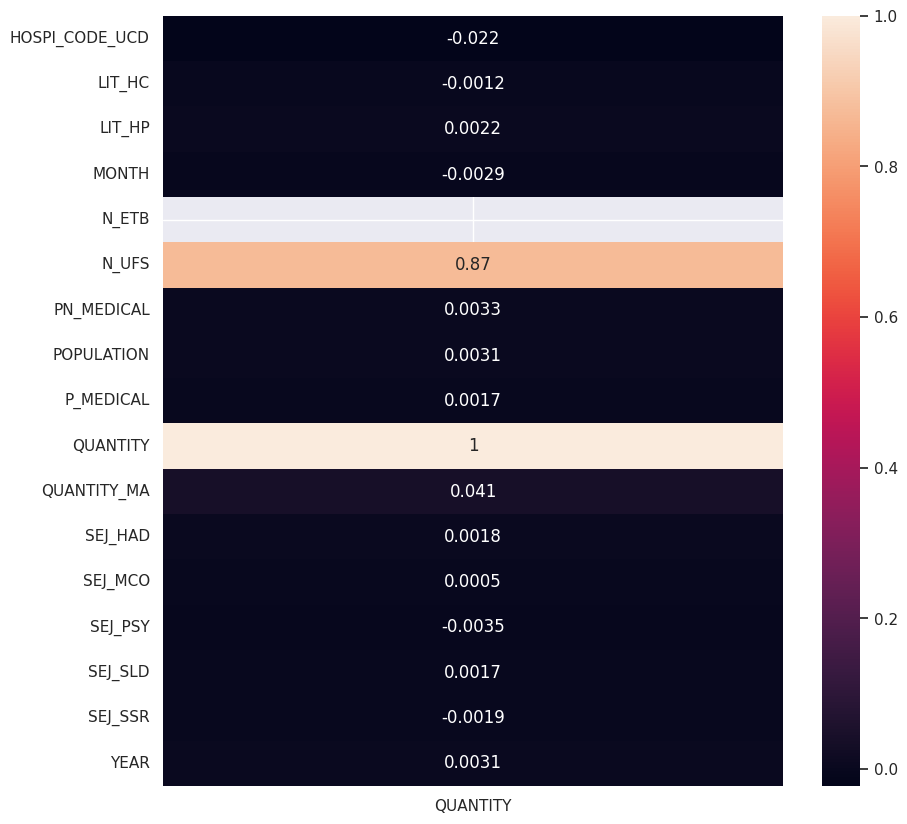

In [ ]:
corr = df_h3_ma_3.corr(numeric_only=True)
x = corr[['QUANTITY']]
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(x,annot=True)

<Axes: >

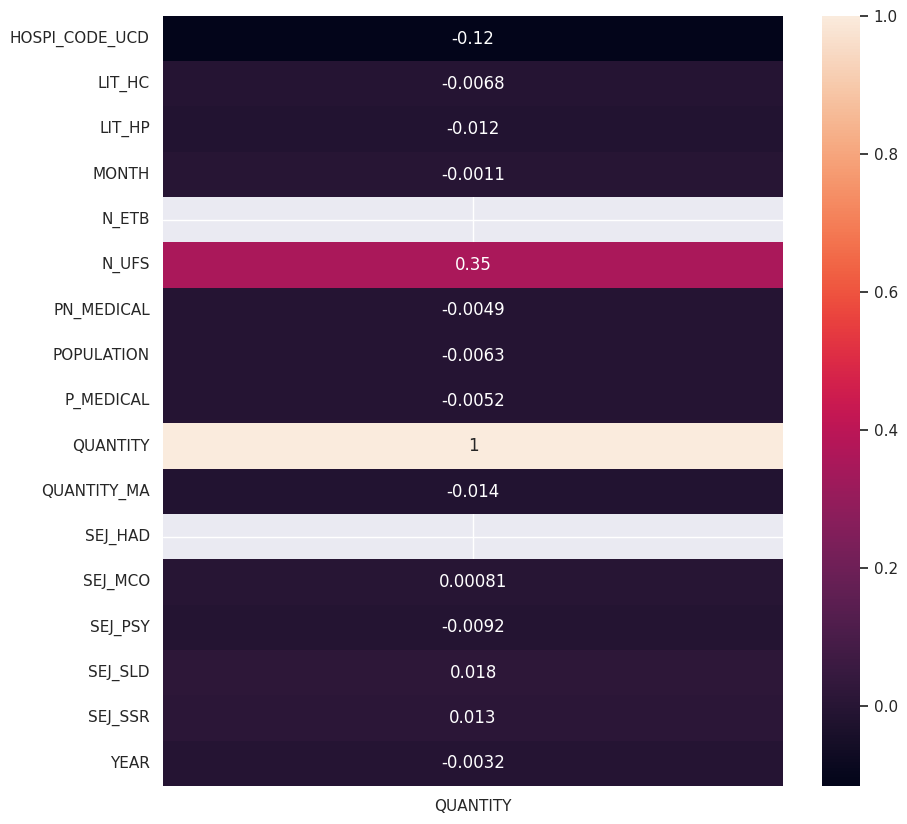

In [ ]:
corr = df_h4_ma_3.corr(numeric_only=True)
x = corr[['QUANTITY']]
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(x,annot=True)

<Axes: >

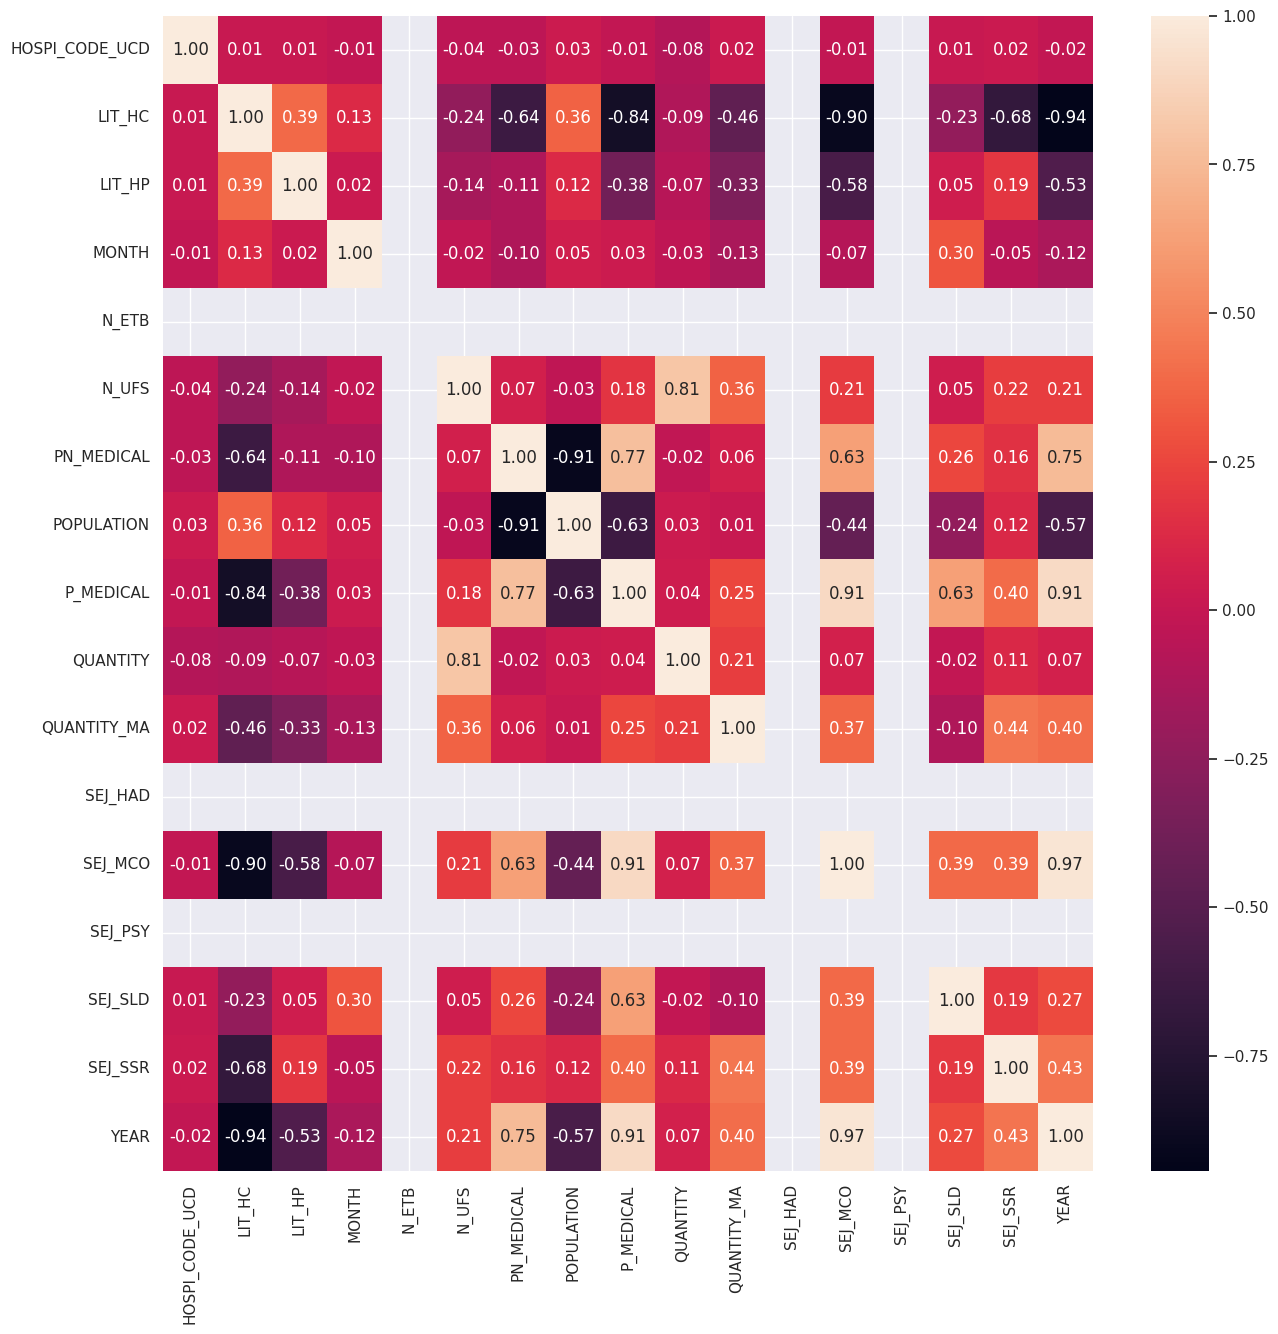

In [ ]:

'''
  The constant values are not displayed in the correlation.
'''

corr = df_h1_ma_3.corr(numeric_only=True)
sns.set(rc={'figure.figsize': (15, 15)})
sns.heatmap(corr, annot=True, fmt='.2f')


<Axes: >

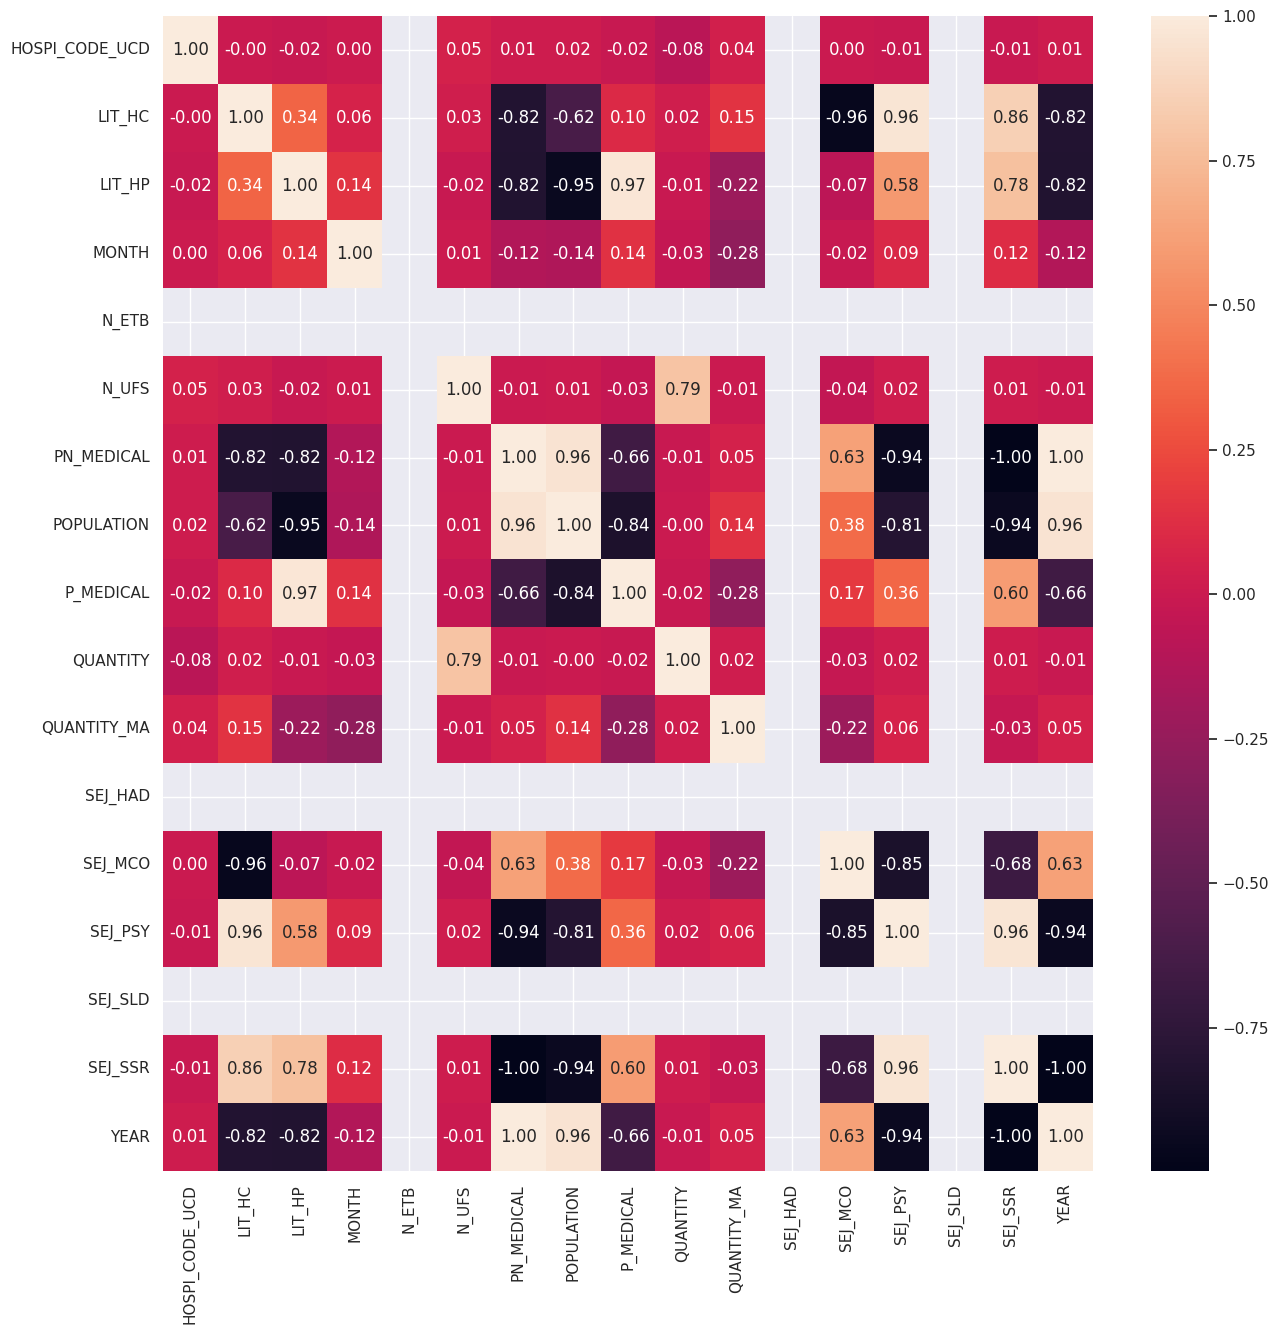

In [ ]:

'''
  The constant values are not displayed in the correlation.
'''

corr = df_h2_ma_3.corr(numeric_only=True)
sns.set(rc={'figure.figsize': (15, 15)})
sns.heatmap(corr, annot=True, fmt='.2f')


<Axes: >

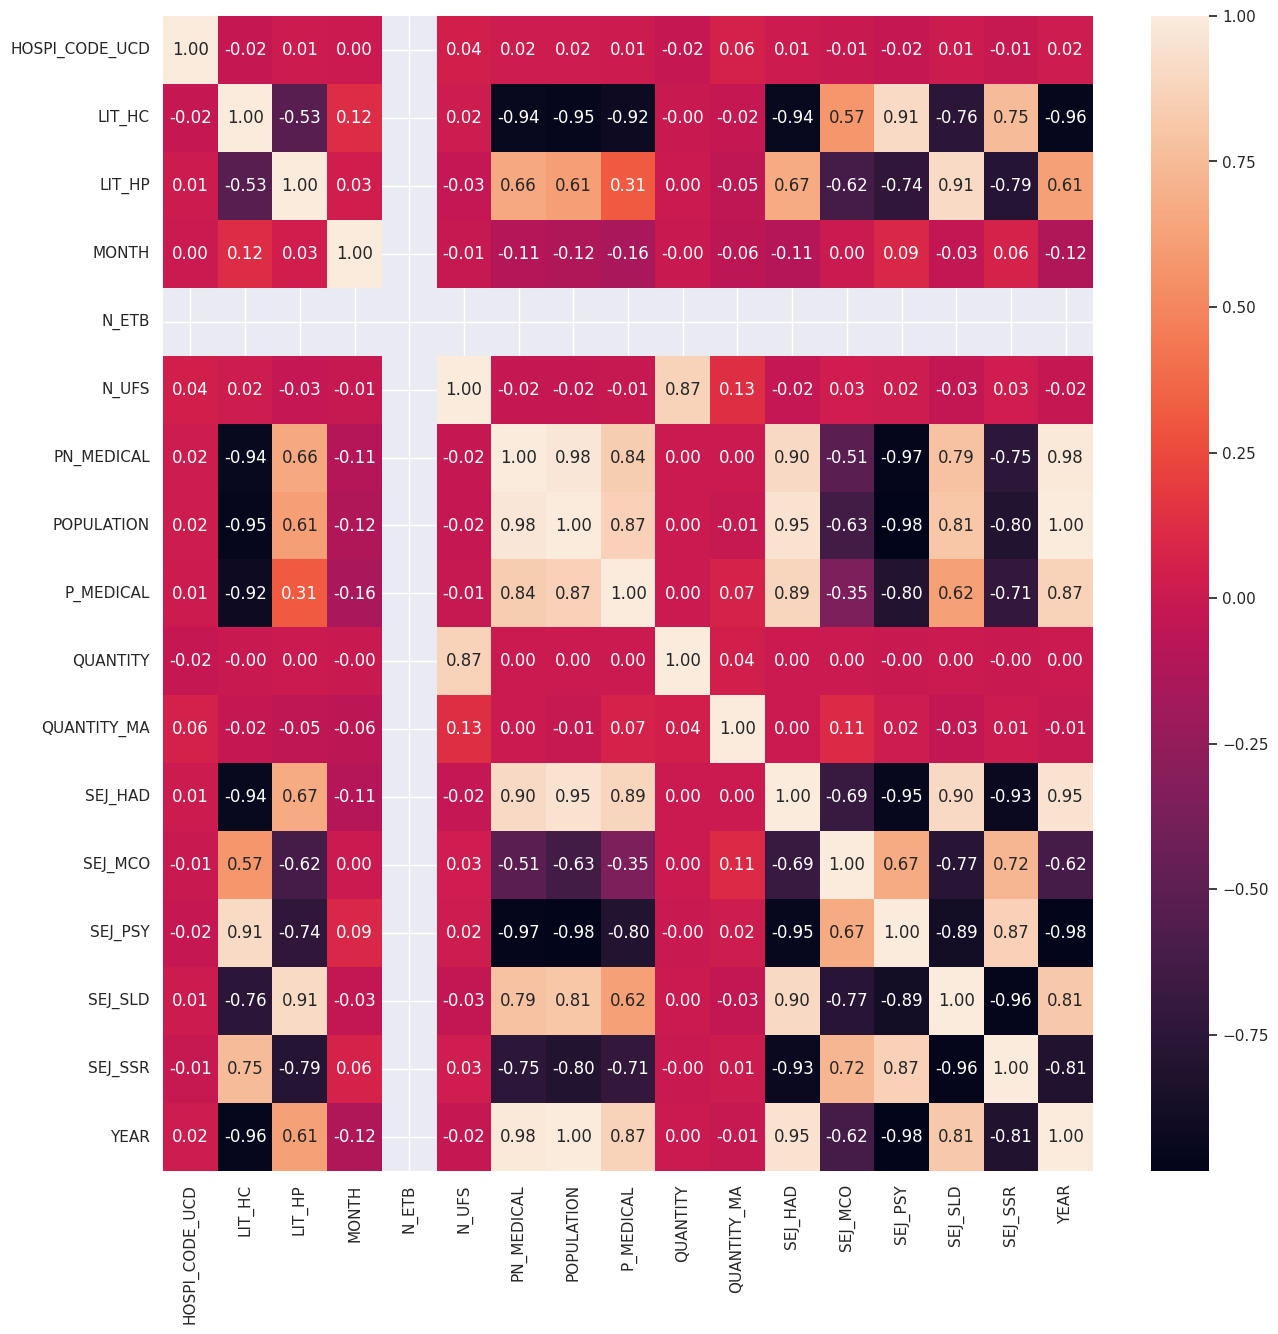

In [ ]:

'''
  The constant values are not displayed in the correlation.
'''

corr = df_h3_ma_3.corr(numeric_only=True)
sns.set(rc={'figure.figsize': (15, 15)})
sns.heatmap(corr, annot=True, fmt='.2f')


<Axes: >

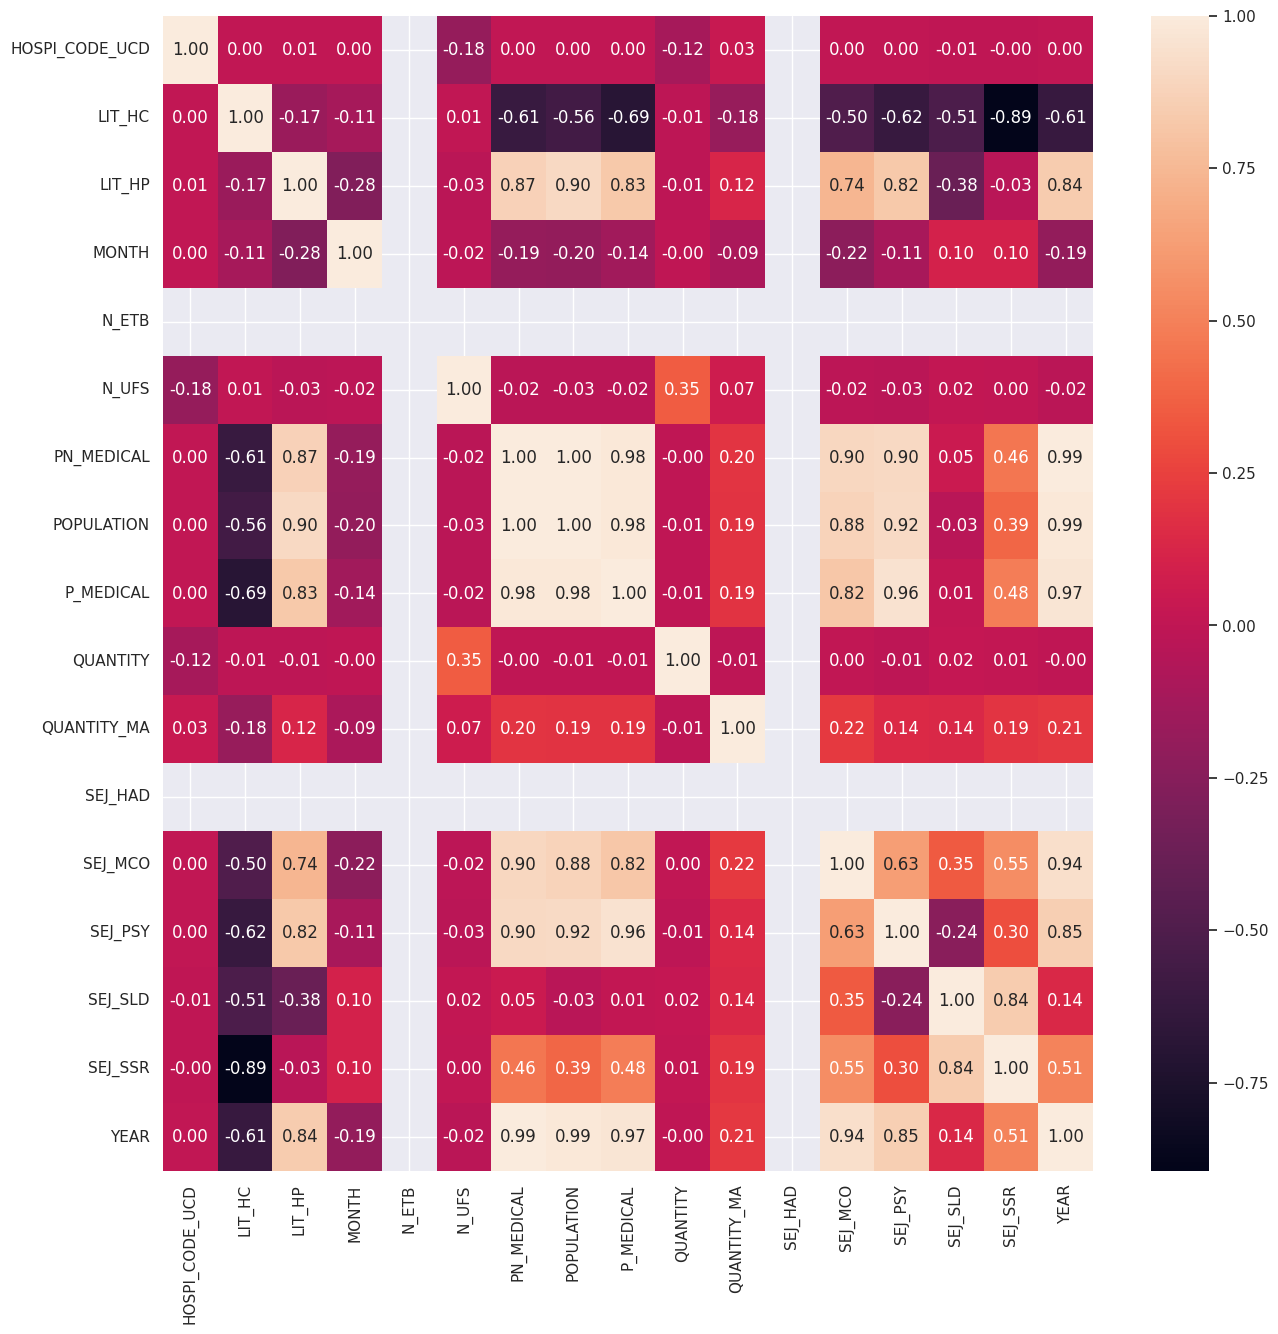

In [ ]:

'''
  The constant values are not displayed in the correlation.
'''

corr = df_h4_ma_3.corr(numeric_only=True)
sns.set(rc={'figure.figsize': (15, 15)})
sns.heatmap(corr, annot=True, fmt='.2f')


In [ ]:
# Feature selection
df_h1_modified = df_h1_ma_3.drop(['N_ETB','SEJ_HAD', 'SEJ_PSY'], axis=1).copy()

df_h2_modified = df_h2_ma_3.drop(['N_ETB','SEJ_HAD', 'SEJ_SLD'], axis=1).copy()

df_h3_modified = df_h3_ma_3.drop(['N_ETB'], axis=1).copy()

df_h4_modified = df_h4_ma_3.drop(['N_ETB','SEJ_HAD'], axis=1).copy()

In [ ]:
def dummies(df):
  month_dummies = pd.get_dummies(df['MONTH'], prefix='MONTH')
  hospi_dummies = pd.get_dummies(df['HOSPI_CODE_UCD'], prefix='UCD')

  df_encoded = pd.concat([df, month_dummies, hospi_dummies], axis=1)
  df_encoded = df_encoded.drop(['MONTH'], axis=1)

  return df_encoded

df_h1_modified = dummies(df_h1_modified)
df_h2_modified = dummies(df_h2_modified)
df_h3_modified = dummies(df_h3_modified)
df_h4_modified = dummies(df_h4_modified)

In [ ]:
df_h1_modified.to_csv('df_h1_ma.csv', index=False)
df_h2_modified.to_csv('df_h2_ma.csv', index=False)
df_h3_modified.to_csv('df_h3_ma.csv', index=False)
df_h4_modified.to_csv('df_h4_ma.csv', index=False)